# Exploratory Data Analysis & Data Preprocessing

*In this IPython notebook, I'll be detailing all the steps I took to properly understand the information that the data I've collected the paper, "Cross-platform dataset of multiplex fluorescent cellular object image annotations" has to offer and figure out the steps that need to be taken for preprocessing the data*

##### Imports

In [63]:
import os
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread, imsave, imshow
from PIL import Image
import shutil
# import imagej
# ij = imagej.init(r'C:\Users\gopik\Downloads\fiji-win64\Fiji.app')

##### Helper Functions

In [30]:
def get_files_wrt_extension(path, file_extension):
    """Get all files with a given extension in the given directory"""
    file_paths = []
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith(file_extension):
                file_paths.append(os.path.join(root, file))
    return file_paths

In [60]:
def crop_image(input_path, output_path, left, upper, right, lower):
    image = Image.open(input_path)
    cropped_image = image.crop((left, upper, right, lower))
    cropped_image.save(output_path)

##### Loading the Data

In [31]:
IMG_DIR = r'D:\SimBioSys - main\data\organized_data\image'
MASK_DIR =r'D:\SimBioSys - main\data\organized_data\mask'

##### Image Data

In [32]:
image_paths = get_files_wrt_extension(IMG_DIR, ".tif")

In [33]:
image_array_list = [np.array(imread(img)) for img in image_paths]

In [34]:
#Number of Images
print(len(image_array_list))

161


In [35]:
#Dimensions
img_dims = [img.shape for img in image_array_list]

In [36]:
#Unique dimensions for images in the dataset
print(np.unique(img_dims))

[(5, 800, 800) (7, 400, 400, 4) (7, 800, 800) (8, 400, 400)
 (8, 400, 400, 4) (8, 2008, 2684)]


c:\Users\gopik\anaconda3\envs\programming\lib\site-packages\numpy\lib\arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [37]:
#Number of images for each set of dimensions
dim, count = np.unique(img_dims, return_counts=True)
img_counter = {d : c for d, c in zip(dim, count)}
print(img_counter)

{(5, 800, 800): 15, (7, 400, 400, 4): 5, (7, 800, 800): 3, (8, 400, 400): 132, (8, 400, 400, 4): 5, (8, 2008, 2684): 1}


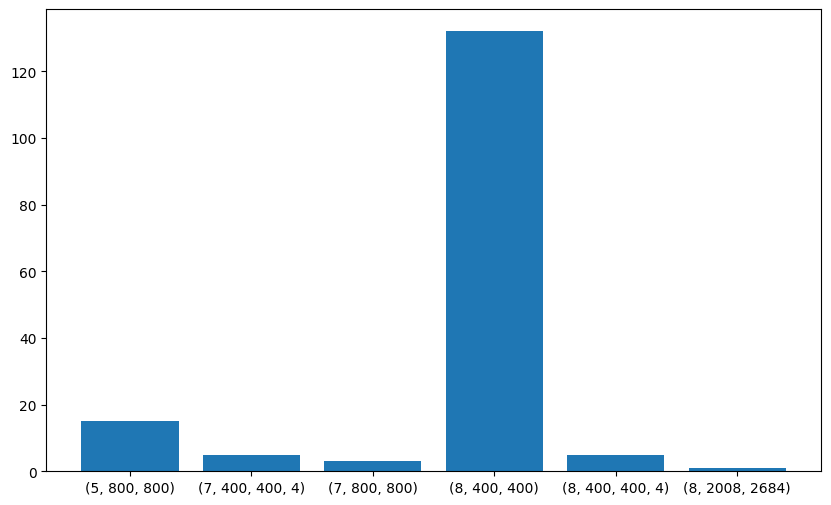

In [38]:
plt.figure(figsize=(10, 6)) 
plt.bar(range(len(dim)), count)
plt.xticks(range(len(dim)), dim)
plt.show()

*From the above results, we can ascertain that the input images in the dataset have differring dimensions and we would need to take steps to bring all the images to a specific dimensions*

**Task 1: Resize Input Images**

*Since a huge chunk of the dataset is of the dimension (8, 400, 400), let's visualize the remaining to explore possible avenues to bring all the images to a common dimension*

In [39]:
required_image_paths = []
required_image_dims = []
required_dims = [(5, 800, 800), (7, 400, 400, 4), (7, 800, 800), (8, 400, 400, 4), (8, 2008, 2684)]
for img in image_paths:
    img_array = np.array(imread(img))
    if img_array.shape in required_dims:
        required_image_paths.append(img)
        required_image_dims.append(img_array.shape)

In [40]:
outlier_images_df = pd.DataFrame(
    {'path': required_image_paths,
     'dims': required_image_dims,
    })
outlier_images_df = outlier_images_df.sort_values(by=['dims']).copy()
outlier_images_df

,path,dims
14,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
23,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
22,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
21,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
20,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
19,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
18,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
17,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
16,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
15,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"


In [41]:
mask_paths = get_files_wrt_extension(MASK_DIR, ".png")
for i in range(29):
    test_case = outlier_images_df.iloc[i]
    test_sample = os.path.basename(test_case.path).split('-')[0]
    for mask in mask_paths:
        if test_sample in mask:
            test_mask = mask
            break
    print(f"Image Dims: {test_case.dims}, Mask Dims: {imread(test_mask).shape}")

Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image

In [45]:
sorted(outlier_images_df.path.values)

['D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(1700,2600)-crop_tiff.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(2400,800)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(3200,800)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(4500,2000)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(5900,2600)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(4200,5200)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(4900,3600)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(4900,5150)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(5300,3600)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(5600,4700)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\p03-10012(56707.13038)650,600-crop_tif.tif',
 'D:\\SimBioS

*On observing that paths, we realize that the problematic data are those from the CODEX and Zeiss platforms. Ideally, if we remove them from the group, we should have 133 samples of the same image and mask sizes. Let's confirm that theory*

In [46]:
vectra_path = r"D:\SimBioSys - main\data\rough_data\Vectra"

In [47]:
vectra_image_paths = get_files_wrt_extension(vectra_path, ".tif")
vectra_mask_paths = get_files_wrt_extension(vectra_path, ".png")

In [49]:
print(f"Number of Images: {len(vectra_image_paths)}")
print(f"Number of Masks: {len(vectra_mask_paths)}")

Number of Images: 133
Number of Masks: 133


In [50]:
vectra_image_dims = []
vectra_mask_dims = []
for img_path, mask_path in zip(vectra_image_paths, vectra_mask_paths):
    vectra_image_dims.append(imread(img_path).shape)
    vectra_mask_dims.append(imread(mask_path).shape)

In [51]:
set(vectra_image_dims)

{(8, 400, 400), (8, 2008, 2684)}

In [52]:
set(vectra_mask_dims)

{(400, 400)}

*Now we see that in Vectra, we have 132 perfect samples and one outlier. We'll the find the path to the image and mask and verify if the (8, 2008, 2684) dimensions is just an error in the dataset and if it  can be cropped down to (8, 400, 400). We'll find the path here and do the verification using ImageJ and it's plugins.*

In [53]:
outlier_index = vectra_image_dims.index((8, 2008, 2684))
print(f"Outlier Path: {vectra_image_paths[outlier_index]}")

Outlier Path: D:\SimBioSys - main\data\rough_data\Vectra\p03-10012(56707.13038)650,600-crop_tif.tif


*On checking the samples, it was observed that original image can be cropped to the required dimension because the mask is only for a specific crop of that image. We'll seperate it from the original dataset by renaming and crop using ImageJ. Once that's done, we'll add it back to our main data directory as follows:*

In [57]:
outlier_path = vectra_image_paths[outlier_index]
outlier_dir = os.path.dirname(outlier_path)
renamed_path = os.path.join(outlier_dir, "to_be_cropped.tiff")
os.rename(outlier_path, renamed_path)

In [75]:
shutil.copy2(outlier_path, r"D:\SimBioSys - main\data\organized_data\image\p03-10012(56707.13038)650,600-crop_tif.tif")

'D:\\SimBioSys - main\\data\\organized_data\\image\\p03-10012(56707.13038)650,600-crop_tif.tif'

*After cropping, I've verified with ImageJ that it fit the standards we kept. We'll re-run the earlier script to check if the dataset is proper*

In [81]:
image_paths = get_files_wrt_extension(IMG_DIR, ".tif")

In [82]:
image_array_list = [np.array(imread(img)) for img in image_paths]

In [83]:
#Number of Images
print(len(image_array_list))

161


In [84]:
#Dimensions
img_dims = [img.shape for img in image_array_list]

In [85]:
#Unique dimensions for images in the dataset
print(np.unique(img_dims))

[(5, 800, 800) (7, 400, 400, 4) (7, 800, 800) (8, 400, 400)
 (8, 400, 400, 4)]


c:\Users\gopik\anaconda3\envs\programming\lib\site-packages\numpy\lib\arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [86]:
#Number of images for each set of dimensions
dim, count = np.unique(img_dims, return_counts=True)
img_counter = {d : c for d, c in zip(dim, count)}
print(img_counter)

{(5, 800, 800): 15, (7, 400, 400, 4): 5, (7, 800, 800): 3, (8, 400, 400): 133, (8, 400, 400, 4): 5}


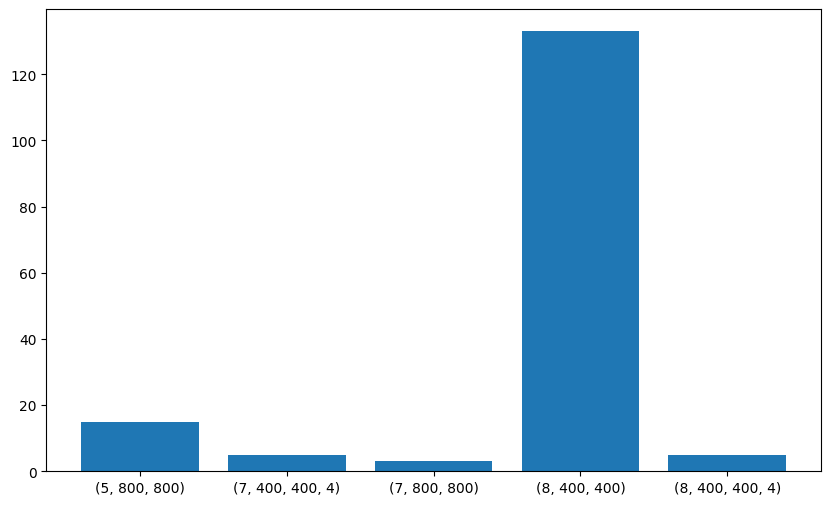

In [87]:
plt.figure(figsize=(10, 6)) 
plt.bar(range(len(dim)), count)
plt.xticks(range(len(dim)), dim)
plt.show()

*At this stage, we have a dataset which is heavily skewed to one set of dimensions. Therefore we have 3 possible options going forward.*
1. Drop the outlier data and use the remaining data to create the model and create a Proof-Of-Concept.
2. Invest time into bringing outlier data into the same dimensions as the main dataset.
3. Develop different models to work on different data dimensions.

The third option is not viable at this point because of the lack of data required sufficiently train the model for those dimension. The second option is a viable, however it would require extensive research into figuring out what would the correct method to resize the model without having extensive loss in information in the process. Therefore, we'll proceed with the first step and establish a working model provide a proof of concept.

In [42]:
mask_paths = get_files_wrt_extension(MASK_DIR, ".png")
mask_array_list = [np.array(imageio.imread(mask)) for mask in mask_paths]
#Number of Masks
print(len(mask_array_list))
mask_dims = [tuple(mask.shape) for mask in mask_array_list]
#Number of masks for each set of dimensions
mask_counter = {}
for dim in mask_dims:
    if dim in mask_counter:
        mask_counter[dim]+=1
    else:
        mask_counter[dim] = 1
print(mask_counter)

161
{(400, 400): 143, (800, 800): 18}
